In [1]:
from fonctions import *

In [2]:
# récupération des articles et des tags

dic = lire_json("articlesTags_nltk.json")

new_dic = reorganiser_dico(dic)

In [3]:
# séparation des informations dans trois listes différentes

chemins_articles = [x for x in new_dic.keys()]

liste_tags = [x[1] for x in new_dic.values()]

liste_titres = [x[2] for x in new_dic.values()]

print(liste_tags[:3])
print(liste_titres[:3])

[['NNP', 'FW', 'FW', 'NNS', 'VBP', 'JJ', 'NN', 'IN', 'FW', 'JJ', 'FW', 'IN', 'CD'], ['NNP', 'NNS', 'VBP', 'NN', ':', 'IN', 'NNS', 'VBP', 'JJR', 'NN', 'NN', 'NN', 'JJ', 'NN'], ['NNP', 'FW', 'FW', '.', 'NNS', 'NNS', ':']]
['Identification de trois gènes expliquant la virulence de la grippe espagnole de 1918', 'Les chantiers du Président : On ne peut cacher le soleil avec un tamis', 'Gueule de bois ? Quelques remèdes...']


In [4]:
# Vectorisation des documents et création du model

X, V = creer_X(liste_tags, 2, 3)

model = creer_model_KM(4, X)

predictions = model.predict(X)

print(predictions[:100])
print(effectifs_clusters(model))

[0 0 1 0 3 0 0 0 2 2 1 1 0 0 0 2 2 0 0 0 0 0 0 2 0 0 1 0 0 2 2 2 3 1 0 1 0
 0 3 3 2 3 0 0 2 0 3 0 0 3 0 2 0 0 2 2 1 3 0 1 0 1 2 0 0 0 0 0 3 0 1 0 0 0
 0 1 0 3 2 1 0 3 0 3 0 0 0 0 0 0 1 0 0 1 3 3 3 0 3 3]
{0: 3248, 1: 703, 3: 610, 2: 1124}


In [7]:
# extraction de titres d'articles au hasard pour chaque cluster

dictionnaire = dic_complet(X, predictions, liste_tags, liste_titres)

afficher_titres_hasard(2, dictionnaire)

Cluster 0 : 614 articles
OLYMPIQUE DE MARSEILLE Samassa était bien là
NNP NNP NNP NNP NNP NN NN
Le Général Mamadouba Toto Camara opte pour une police plus professionnelle
NNP NNP NNP NNP NNP IN JJ JJ NN CC NN
----------
Cluster 1 : 693 articles
Parution du dernier numéro de la revue des sapeurs-pompiers avec un portrait de la première femme sapeur-pompier du Maroc
NN NN NN FW FW FW FW FW NNS FW JJ NN IN FW FW JJ JJ NN NNP
Epidémie de choléra au Zimbabwe : la communauté internationale se mobilise
NNP FW FW FW NNP : NN VBP JJ NN NN
----------
Cluster 2 : 1133 articles
Le ptrole manquera d'investissement
NNP NN NN NN
Vendée Globe : Ejecté de son bateau, Eliès est remonté à bord avec son fémur cassé
NNP NNP : NNP IN NN NN , NNP JJS NN NN NN IN NN NN NN
----------
Cluster 3 : 3245 articles
Grand froid et maladies hivernales: appel à la "vigilance" des autorités
NNP NN NN NNS NNS : NN NNP VBZ `` NN '' NNS VBP
Gaza - Réunion d'urgence à Paris
NNP : NN NN CD NNP
----------


In [8]:
# affichage des dimensions caractéristiques de chaque cluster
        
dimensions_clusters(model, V)

Cluster 0:
(NNP NNP) | (NNP NNP NNP) | (NNP NNP NN) | (NNP NN) | (NN NN) | (NN NNP) | (NN NNP NNP) | (NNP NN NN) | (NNP NNP VBZ) | (NNP VBZ) | 
----------
Cluster 1:
(FW FW) | (FW FW FW) | (FW FW NN) | (FW NN) | (NN FW FW) | (NN FW) | (NN NN) | (NNP FW FW) | (NNP FW) | (NNP NN) | 
----------
Cluster 2:
(NN NN) | (NN NN NN) | (NNP NN NN) | (NNP NN) | (NN NNP) | (JJ NN) | (NN NN NNP) | (JJ NN NN) | (NN JJ) | (NN NNP NN) | 
----------
Cluster 3:
(NN NN) | (JJ NN) | (NNP NN) | (NNS VBP) | (NNP NNP) | (NN NNP) | (NNS NNS) | (NN NNS) | (NN IN) | (JJ NN NN) | 
----------


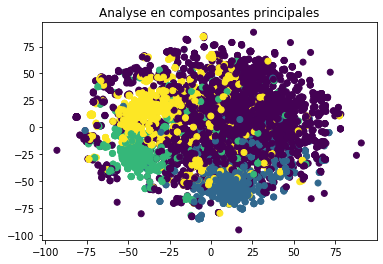

In [8]:
# Tracer l'analyse en composantes principales

tracer_ACP(X, predictions)

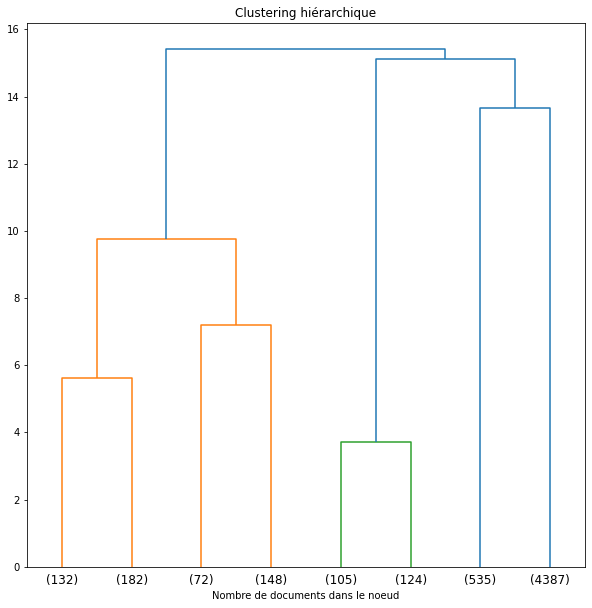

In [5]:
# Tracer le dendrogramme avec un clustering hiérarchique

model = AgglomerativeClustering(n_clusters=4, compute_distances=True)
model = model.fit(X)
tracer_dendrogram(model)

In [6]:
print(effectifs_clusters(model))

{1: 4387, 3: 535, 0: 534, 2: 229}


In [46]:
import nltk

nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or